In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv('./train.csv', index_col=0)
test_df = pd.read_csv('./test.csv', index_col=0)

In [3]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


D:\softwares\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log(price + 1)'}>]], dtype=object)

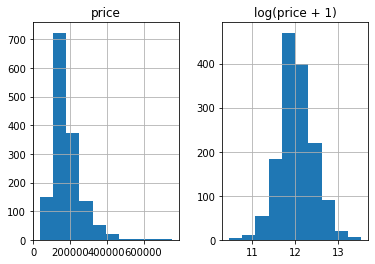

In [4]:
# 把不正的结果变的正态化，把label给平滑化
%matplotlib inline
prices = pd.DataFrame({"price" : train_df["SalePrice"], "log(price + 1)" : np.log1p(train_df["SalePrice"])})
prices.hist()

In [5]:
prices.head()

,price,log(price + 1)
Id,,
1,208500,12.247699
2,181500,12.109016
3,223500,12.317171
4,140000,11.849405
5,250000,12.429220


In [6]:
y_train = np.log1p(train_df.pop('SalePrice'))

In [7]:
all_df = pd.concat((train_df, test_df), axis=0)

In [8]:
all_df.shape

(2919, 79)

In [9]:
y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

# 变量转化

In [10]:
all_df['MSSubClass'].dtypes

dtype('int64')

In [11]:
# 把数据类型转化为string
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)

In [12]:
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [13]:
# 把category的变量转化为numerical表达形式
pd.get_dummies(all_df['MSSubClass'], prefix='MSSubClass').head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [14]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


## 处理numerical变量

In [15]:
# 数据缺失
all_dummy_df.isnull().sum().sort_values(ascending=False).head()

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
dtype: int64

In [16]:
# 用平均值填充
mean_cols = all_dummy_df.mean()
mean_cols.head(10)

LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
BsmtUnfSF         560.772104
dtype: float64

In [17]:
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [18]:
# 查看是否还有空缺
all_dummy_df.isnull().sum().sum()

0

In [19]:
# 标准化numerical数据
numerical_cols = all_df.columns[all_df.dtypes != 'object']
numerical_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [33]:
# 计算标准分布
numerical_col_means = all_dummy_df.loc[:, numerical_cols].mean()
numerical_col_std = all_dummy_df.loc[:, numerical_cols].std()
all_dummy_df.loc[:, numerical_cols] = (all_dummy_df.loc[:, numerical_cols] - numerical_col_means) / numerical_col_std

# 建立模型

In [34]:
# 把数据集分回 训练/测试集
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [35]:
dummy_train_df.shape, dummy_test_df.shape

((1460, 303), (1459, 303))

In [36]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [37]:
# 把DF转化为Numpy Array
X_train = dummy_train_df.values
X_test = dummy_test_df.values

In [38]:
# 用sklearn自带的cross validation方法来测试模型
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5, 1.0, 'Alpha vs CV Error')

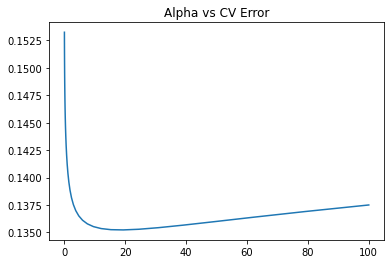

In [26]:
import matplotlib.pyplot as plt
# matplotlib inline
plt.plot(alphas, test_scores)
plt.title('Alpha vs CV Error')

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5, 1.0, 'Max Features vs CV Error')

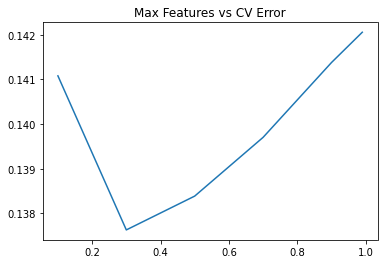

In [40]:
plt.plot(max_features, test_scores)
plt.title('Max Features vs CV Error')

# Ensemble

In [41]:
ridge = Ridge(alpha=15)
rf = RandomForestRegressor(n_estimators=500, max_features=.3)

In [42]:
ridge.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=0.3, n_estimators=500)

In [45]:
y_ridge = np.expm1(ridge.predict(X_test))
y_rf = np.expm1(rf.predict(X_test))

In [46]:
y_final = (y_ridge + y_rf) / 2

# 提交结果

In [47]:
submisson_df = pd.DataFrame(data = {'Id' : test_df.index, 'SalePrice' : y_final})

In [48]:
submisson_df.head(10)

,Id,SalePrice
0,1461,119846.874547
1,1462,151228.449164
2,1463,175258.768273
3,1464,189628.324080
4,1465,196409.809015
5,1466,175900.940811
6,1467,177503.725884
7,1468,168943.236283
8,1469,183884.193655
9,1470,122828.719045


In [49]:
submisson_df.to_csv(r'./submisson.csv')

# 高级一点的Ensemble

In [53]:
from sklearn.ensemble import BaggingRegressor
ridge1 = Ridge(15)

In [56]:
params = [1, 10, 15, 20, 25, 30 ,40]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=ridge1)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5, 1.0, 'n_estimators vs CV Error')

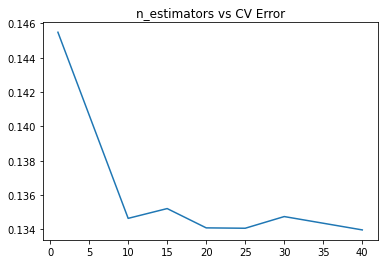

In [57]:
plt.plot(params, test_scores)
plt.title('n_estimators vs CV Error')

In [58]:
# Boosting
from sklearn.ensemble import AdaBoostRegressor

In [62]:
params1 = [10, 15, 20, 25, 30, 35, 40, 45, 50]
test_scores1 = []
for param in params1:
    clf = BaggingRegressor(n_estimators=param, base_estimator=ridge1)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores1.append(np.mean(test_score))

Text(0.5, 1.0, 'n_estimators vs CV Error')

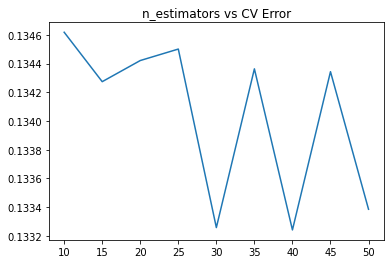

In [63]:
plt.plot(params1, test_scores1)
plt.title('n_estimators vs CV Error')

In [27]:
# XGBoost
from xgboost import XGBRegressor

In [28]:
params2 = [1,2,3,4,5,6]
test_scores2 = []
for param in params2:
    clf = XGBRegressor(max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores2.append(np.mean(test_score))

Text(0.5, 1.0, 'n_estimators vs CV Error')

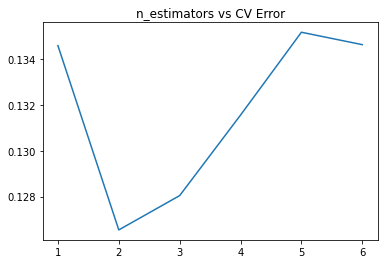

In [29]:
plt.plot(params2, test_scores2)
plt.title('n_estimators vs CV Error')

In [40]:
xgboost1 = XGBRegressor(max_depth=2, learning_rate=0.1, n_estimators=200, objective='reg:gamma')
xgboost1.fit(X_train, y_train)
y_xgb = np.expm1(xgboost1.predict(X_test))

In [43]:
submisson_df = pd.DataFrame(data = {'Id' : test_df.index, 'SalePrice' : y_xgb})

In [44]:
submisson_df.head()

,Id,SalePrice
0,1461,119891.664062
1,1462,155952.406250
2,1463,178859.125000
3,1464,184888.015625
4,1465,192408.156250


In [45]:
submisson_df.to_csv(r'./submisson.csv')